### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Carrega imagens de treino e teste com tamanho 512px.

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')
#-----------------------------------------------------------------------------------------------------------#
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

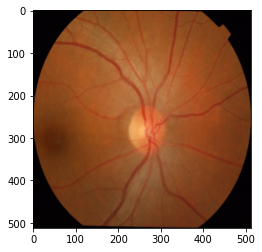

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
red_channel_train = get_color_channel(0, img_train)
len(red_channel_train)

50

### Test images

In [5]:
red_channel_test = get_color_channel(0, img_test)
len(red_channel_test)

51

#### Generator of augmented data:

Testing the data generator and generator for augmented data:

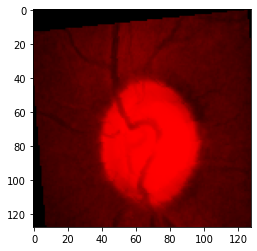

In [6]:
gen = data_generator(red_channel_train, cup_train, disc_locations, 128, 'train')
batch = next(gen)

plt.imshow(batch[0][0])
plt.show()

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(red_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
len(X_test), len(Y_test)

(51, 51)

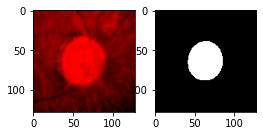

In [8]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [9]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(red_channel_train, 
                    cup_train, disc_locations, 
                    'cup_red', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 25s 228ms/step - loss: 1.5957 - mean_IOU_gpu: 0.0861 - dice_metric: 0.1568 - val_loss: 1.4700 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 24s 238ms/step - loss: 1.5483 - mean_IOU_gpu: 0.0439 - dice_metric: 0.0831 - val_loss: 1.4327 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 28s 286ms/step - loss: 1.5181 - mean_IOU_gpu: 0.0208 - dice_metric: 0.0407 - val_loss: 1.3805 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 39s 395ms/step - loss: 1.4221 - mean_IOU_gpu: 0.0524 - dice_metric: 0.0983 - val_loss: 1.3056 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 40s 404ms/step - loss: 1.3839 - mean_IOU_gpu: 0.1929 - dice_metric: 0.3201 - val_loss: 1.2279 - val_mean_IOU_gpu: 0

Epoch 41/500
99/99 [==============================] - 40s 403ms/step - loss: 0.2603 - mean_IOU_gpu: 0.6290 - dice_metric: 0.7538 - val_loss: 0.2763 - val_mean_IOU_gpu: 0.5788 - val_dice_metric: 0.7222
Epoch 42/500
99/99 [==============================] - 41s 411ms/step - loss: 0.2694 - mean_IOU_gpu: 0.6196 - dice_metric: 0.7433 - val_loss: 2.3140 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 43/500
99/99 [==============================] - 40s 402ms/step - loss: 0.2080 - mean_IOU_gpu: 0.6547 - dice_metric: 0.7817 - val_loss: 1.6975 - val_mean_IOU_gpu: 0.0017 - val_dice_metric: 0.0032
Epoch 44/500
99/99 [==============================] - 40s 403ms/step - loss: 0.2423 - mean_IOU_gpu: 0.6205 - dice_metric: 0.7525 - val_loss: 0.5553 - val_mean_IOU_gpu: 0.3694 - val_dice_metric: 0.5202
Epoch 45/500
99/99 [==============================] - 40s 405ms/step - loss: 0.2525 - mean_IOU_gpu: 0.6345 - dice_metric: 0.7585 - val_loss: 1.1541 - val_mean_IOU_gpu: 0.0831 - val_dice_me

99/99 [==============================] - 40s 407ms/step - loss: 0.1941 - mean_IOU_gpu: 0.6685 - dice_metric: 0.7908 - val_loss: 0.9833 - val_mean_IOU_gpu: 0.0048 - val_dice_metric: 0.0091
Epoch 82/500
99/99 [==============================] - 40s 401ms/step - loss: 0.1979 - mean_IOU_gpu: 0.6676 - dice_metric: 0.7897 - val_loss: 1.8697 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 83/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1799 - mean_IOU_gpu: 0.6864 - dice_metric: 0.8045 - val_loss: 0.7380 - val_mean_IOU_gpu: 0.1105 - val_dice_metric: 0.1801
Epoch 84/500
99/99 [==============================] - 41s 410ms/step - loss: 0.2050 - mean_IOU_gpu: 0.6531 - dice_metric: 0.7804 - val_loss: 0.4112 - val_mean_IOU_gpu: 0.4377 - val_dice_metric: 0.5858
Epoch 85/500
99/99 [==============================] - 40s 406ms/step - loss: 0.1781 - mean_IOU_gpu: 0.6922 - dice_metric: 0.8079 - val_loss: 0.8872 - val_mean_IOU_gpu: 0.0146 - val_dice_metric: 0.0269


99/99 [==============================] - 40s 401ms/step - loss: 0.1601 - mean_IOU_gpu: 0.7192 - dice_metric: 0.8266 - val_loss: 0.8831 - val_mean_IOU_gpu: 0.0855 - val_dice_metric: 0.1421
Epoch 121/500
99/99 [==============================] - 40s 404ms/step - loss: 0.1708 - mean_IOU_gpu: 0.7106 - dice_metric: 0.8185 - val_loss: 1.5687 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 122/500
99/99 [==============================] - 40s 406ms/step - loss: 0.1489 - mean_IOU_gpu: 0.7316 - dice_metric: 0.8356 - val_loss: 0.9536 - val_mean_IOU_gpu: 0.0913 - val_dice_metric: 0.1526
Epoch 123/500
99/99 [==============================] - 41s 411ms/step - loss: 0.1571 - mean_IOU_gpu: 0.7155 - dice_metric: 0.8260 - val_loss: 1.7697 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 124/500
99/99 [==============================] - 40s 405ms/step - loss: 0.1844 - mean_IOU_gpu: 0.6758 - dice_metric: 0.7966 - val_loss: 0.6236 - val_mean_IOU_gpu: 0.2593 - val_dice_met

99/99 [==============================] - 39s 394ms/step - loss: 0.1401 - mean_IOU_gpu: 0.7409 - dice_metric: 0.8435 - val_loss: 1.5230 - val_mean_IOU_gpu: 0.0073 - val_dice_metric: 0.0128
Epoch 161/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1349 - mean_IOU_gpu: 0.7376 - dice_metric: 0.8428 - val_loss: 2.4999 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 162/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1377 - mean_IOU_gpu: 0.7406 - dice_metric: 0.8438 - val_loss: 0.9047 - val_mean_IOU_gpu: 0.1493 - val_dice_metric: 0.2243
Epoch 163/500
99/99 [==============================] - 39s 399ms/step - loss: 0.1613 - mean_IOU_gpu: 0.7115 - dice_metric: 0.8225 - val_loss: 1.4000 - val_mean_IOU_gpu: 0.0176 - val_dice_metric: 0.0302
Epoch 164/500
99/99 [==============================] - 40s 399ms/step - loss: 0.1587 - mean_IOU_gpu: 0.7121 - dice_metric: 0.8227 - val_loss: 2.6568 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric:

99/99 [==============================] - 39s 394ms/step - loss: 0.1830 - mean_IOU_gpu: 0.6913 - dice_metric: 0.8051 - val_loss: 0.4058 - val_mean_IOU_gpu: 0.4917 - val_dice_metric: 0.6225
Epoch 201/500
99/99 [==============================] - 39s 389ms/step - loss: 0.1628 - mean_IOU_gpu: 0.7008 - dice_metric: 0.8161 - val_loss: 0.4218 - val_mean_IOU_gpu: 0.5042 - val_dice_metric: 0.6264
Epoch 202/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1598 - mean_IOU_gpu: 0.7199 - dice_metric: 0.8251 - val_loss: 0.6551 - val_mean_IOU_gpu: 0.2850 - val_dice_metric: 0.3773
Epoch 203/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1566 - mean_IOU_gpu: 0.7158 - dice_metric: 0.8249 - val_loss: 0.5720 - val_mean_IOU_gpu: 0.3785 - val_dice_metric: 0.5042
Epoch 204/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1512 - mean_IOU_gpu: 0.7187 - dice_metric: 0.8279 - val_loss: 0.2247 - val_mean_IOU_gpu: 0.6413 - val_dice_metric: 0.7649
Epoc

Epoch 241/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1475 - mean_IOU_gpu: 0.7298 - dice_metric: 0.8348 - val_loss: 0.2559 - val_mean_IOU_gpu: 0.6201 - val_dice_metric: 0.7349
Epoch 242/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1581 - mean_IOU_gpu: 0.7052 - dice_metric: 0.8193 - val_loss: 0.2859 - val_mean_IOU_gpu: 0.5973 - val_dice_metric: 0.7072
Epoch 243/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1735 - mean_IOU_gpu: 0.7011 - dice_metric: 0.8133 - val_loss: 0.2054 - val_mean_IOU_gpu: 0.6646 - val_dice_metric: 0.7712
Epoch 244/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1487 - mean_IOU_gpu: 0.7204 - dice_metric: 0.8291 - val_loss: 0.8441 - val_mean_IOU_gpu: 0.2147 - val_dice_metric: 0.2848
Epoch 245/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1464 - mean_IOU_gpu: 0.7138 - dice_metric: 0.8269 - val_loss: 0.5989 - val_mean_IOU_gpu: 0.3443 - val_dice_metri

99/99 [==============================] - 40s 403ms/step - loss: 0.1554 - mean_IOU_gpu: 0.7201 - dice_metric: 0.8283 - val_loss: 0.2186 - val_mean_IOU_gpu: 0.6550 - val_dice_metric: 0.7630
Epoch 282/500
99/99 [==============================] - 40s 402ms/step - loss: 0.1406 - mean_IOU_gpu: 0.7293 - dice_metric: 0.8365 - val_loss: 0.2446 - val_mean_IOU_gpu: 0.6258 - val_dice_metric: 0.7404
Epoch 283/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1359 - mean_IOU_gpu: 0.7430 - dice_metric: 0.8449 - val_loss: 0.3961 - val_mean_IOU_gpu: 0.5218 - val_dice_metric: 0.6350
Epoch 284/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1440 - mean_IOU_gpu: 0.7333 - dice_metric: 0.8379 - val_loss: 0.6960 - val_mean_IOU_gpu: 0.2944 - val_dice_metric: 0.3840
Epoch 285/500
99/99 [==============================] - 40s 409ms/step - loss: 0.1350 - mean_IOU_gpu: 0.7537 - dice_metric: 0.8509 - val_loss: 0.5902 - val_mean_IOU_gpu: 0.3625 - val_dice_metric: 0.4651
Epoc

Epoch 322/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1680 - mean_IOU_gpu: 0.7081 - dice_metric: 0.8177 - val_loss: 0.2406 - val_mean_IOU_gpu: 0.6313 - val_dice_metric: 0.7429
Epoch 323/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1538 - mean_IOU_gpu: 0.7223 - dice_metric: 0.8283 - val_loss: 0.2994 - val_mean_IOU_gpu: 0.5801 - val_dice_metric: 0.6957
Epoch 324/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1342 - mean_IOU_gpu: 0.7457 - dice_metric: 0.8460 - val_loss: 0.1729 - val_mean_IOU_gpu: 0.6837 - val_dice_metric: 0.7894
Epoch 325/500
99/99 [==============================] - 41s 413ms/step - loss: 0.1383 - mean_IOU_gpu: 0.7441 - dice_metric: 0.8445 - val_loss: 0.1794 - val_mean_IOU_gpu: 0.6787 - val_dice_metric: 0.7838
Epoch 326/500
99/99 [==============================] - 40s 401ms/step - loss: 0.1783 - mean_IOU_gpu: 0.6920 - dice_metric: 0.8071 - val_loss: 0.3035 - val_mean_IOU_gpu: 0.5867 - val_dice_metri

99/99 [==============================] - 38s 388ms/step - loss: 0.1661 - mean_IOU_gpu: 0.7060 - dice_metric: 0.8175 - val_loss: 0.1853 - val_mean_IOU_gpu: 0.6768 - val_dice_metric: 0.7791
Epoch 363/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1512 - mean_IOU_gpu: 0.7197 - dice_metric: 0.8285 - val_loss: 0.2056 - val_mean_IOU_gpu: 0.6617 - val_dice_metric: 0.7681
Epoch 364/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1365 - mean_IOU_gpu: 0.7428 - dice_metric: 0.8447 - val_loss: 0.2164 - val_mean_IOU_gpu: 0.6553 - val_dice_metric: 0.7607
Epoch 365/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1491 - mean_IOU_gpu: 0.7254 - dice_metric: 0.8319 - val_loss: 0.2127 - val_mean_IOU_gpu: 0.6542 - val_dice_metric: 0.7623
Epoch 366/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1439 - mean_IOU_gpu: 0.7309 - dice_metric: 0.8371 - val_loss: 0.2644 - val_mean_IOU_gpu: 0.6118 - val_dice_metric: 0.7232
Epoc

Epoch 403/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1313 - mean_IOU_gpu: 0.7544 - dice_metric: 0.8521 - val_loss: 0.1721 - val_mean_IOU_gpu: 0.6887 - val_dice_metric: 0.7974
Epoch 404/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1602 - mean_IOU_gpu: 0.7159 - dice_metric: 0.8243 - val_loss: 0.1623 - val_mean_IOU_gpu: 0.7009 - val_dice_metric: 0.8042
Epoch 405/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1749 - mean_IOU_gpu: 0.6899 - dice_metric: 0.8053 - val_loss: 0.1722 - val_mean_IOU_gpu: 0.6845 - val_dice_metric: 0.7957
Epoch 406/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1385 - mean_IOU_gpu: 0.7268 - dice_metric: 0.8350 - val_loss: 0.1850 - val_mean_IOU_gpu: 0.6719 - val_dice_metric: 0.7787
Epoch 407/500
99/99 [==============================] - 40s 404ms/step - loss: 0.1706 - mean_IOU_gpu: 0.7010 - dice_metric: 0.8128 - val_loss: 0.1740 - val_mean_IOU_gpu: 0.6910 - val_dice_metri

99/99 [==============================] - 39s 390ms/step - loss: 0.1629 - mean_IOU_gpu: 0.7112 - dice_metric: 0.8210 - val_loss: 0.1771 - val_mean_IOU_gpu: 0.6850 - val_dice_metric: 0.7899
Epoch 444/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1307 - mean_IOU_gpu: 0.7459 - dice_metric: 0.8473 - val_loss: 0.2131 - val_mean_IOU_gpu: 0.6494 - val_dice_metric: 0.7610
Epoch 445/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1394 - mean_IOU_gpu: 0.7384 - dice_metric: 0.8418 - val_loss: 0.1672 - val_mean_IOU_gpu: 0.6927 - val_dice_metric: 0.7960
Epoch 446/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1283 - mean_IOU_gpu: 0.7516 - dice_metric: 0.8508 - val_loss: 0.1731 - val_mean_IOU_gpu: 0.6886 - val_dice_metric: 0.7937
Epoch 447/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1579 - mean_IOU_gpu: 0.7258 - dice_metric: 0.8296 - val_loss: 0.1687 - val_mean_IOU_gpu: 0.6905 - val_dice_metric: 0.7960
Epoc

Epoch 484/500
99/99 [==============================] - 38s 389ms/step - loss: 0.1428 - mean_IOU_gpu: 0.7277 - dice_metric: 0.8354 - val_loss: 0.1951 - val_mean_IOU_gpu: 0.6671 - val_dice_metric: 0.7729
Epoch 485/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1379 - mean_IOU_gpu: 0.7343 - dice_metric: 0.8398 - val_loss: 0.1709 - val_mean_IOU_gpu: 0.6882 - val_dice_metric: 0.7924
Epoch 486/500
99/99 [==============================] - 39s 391ms/step - loss: 0.1182 - mean_IOU_gpu: 0.7626 - dice_metric: 0.8605 - val_loss: 0.1944 - val_mean_IOU_gpu: 0.6702 - val_dice_metric: 0.7760
Epoch 487/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1185 - mean_IOU_gpu: 0.7555 - dice_metric: 0.8563 - val_loss: 0.2095 - val_mean_IOU_gpu: 0.6558 - val_dice_metric: 0.7646
Epoch 488/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1237 - mean_IOU_gpu: 0.7631 - dice_metric: 0.8587 - val_loss: 0.1713 - val_mean_IOU_gpu: 0.6878 - val_dice_metri

### Visual check

image #0


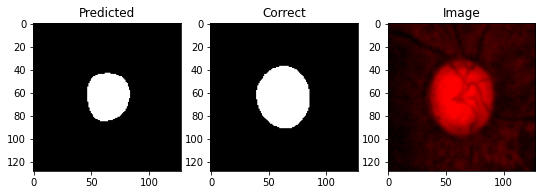

IOU: 0.639217734336853
Dice: 0.779905808477237
image #1


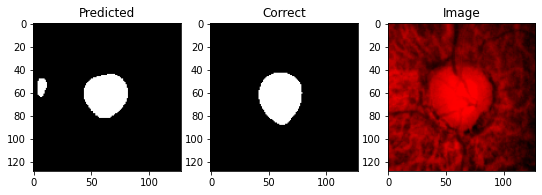

IOU: 0.728215754032135
Dice: 0.8427370948379351
image #2


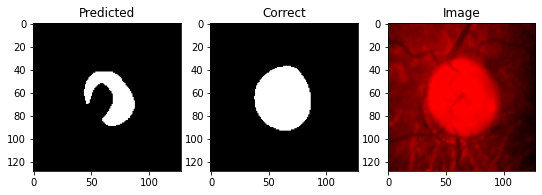

IOU: 0.49580615758895874
Dice: 0.6629283489096574
image #3


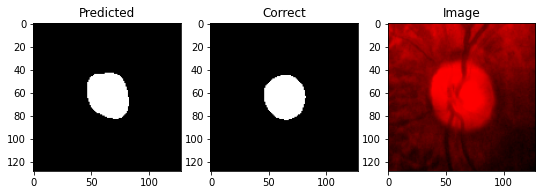

IOU: 0.8471651673316956
Dice: 0.9172597864768683
image #4


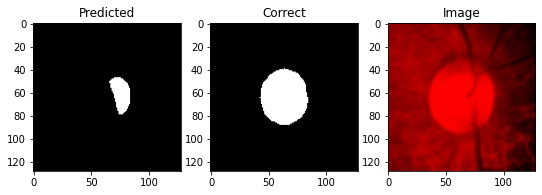

IOU: 0.2461538463830948
Dice: 0.3950617283950617
image #5


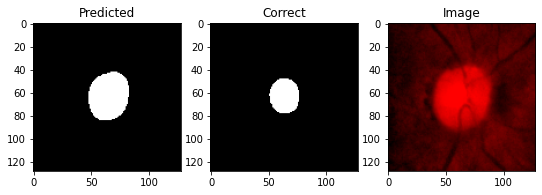

IOU: 0.5274725556373596
Dice: 0.6906474820143885
image #6


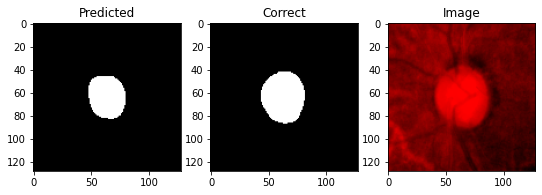

IOU: 0.7350746393203735
Dice: 0.8473118279569892
image #7


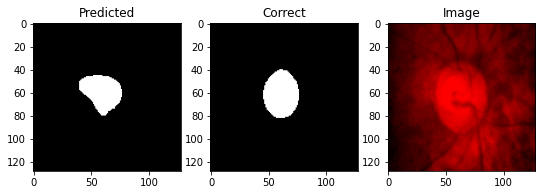

IOU: 0.6865401864051819
Dice: 0.8141403320835565
image #8


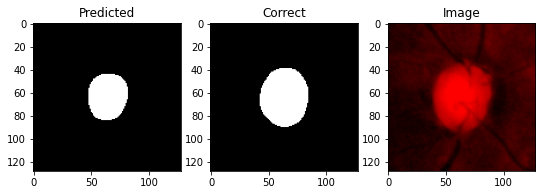

IOU: 0.6629411578178406
Dice: 0.7973116377785638
image #9


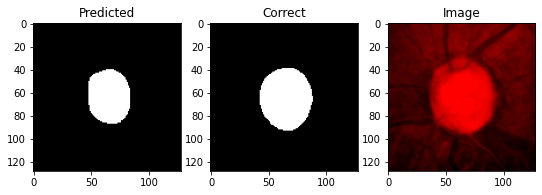

IOU: 0.7311661243438721
Dice: 0.844709388971684
image #10


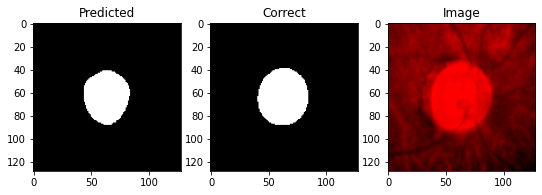

IOU: 0.8367347121238708
Dice: 0.9111111111111111
image #11


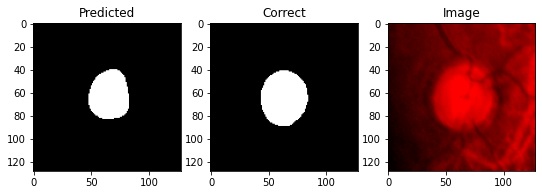

IOU: 0.753337562084198
Dice: 0.8593183466279913
image #12


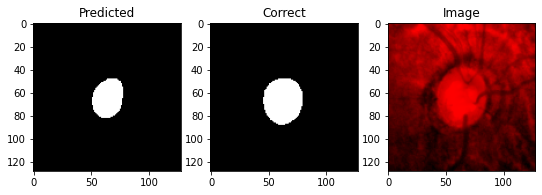

IOU: 0.6569343209266663
Dice: 0.7929515418502202
image #13


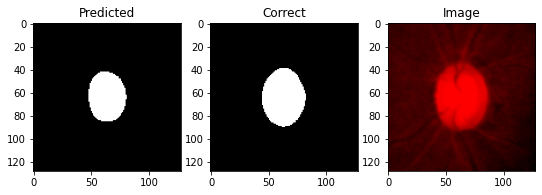

IOU: 0.7724795937538147
Dice: 0.8716372021521906
image #14


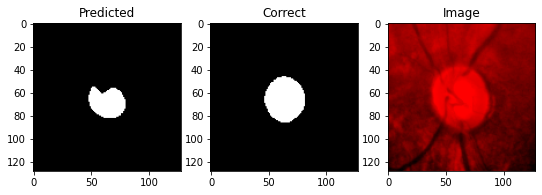

IOU: 0.617977499961853
Dice: 0.7638888888888888
image #15


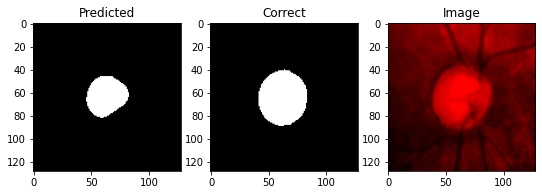

IOU: 0.6041405200958252
Dice: 0.7532264372311303
image #16


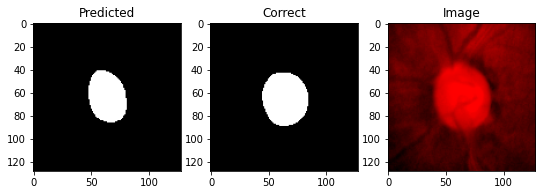

IOU: 0.765999972820282
Dice: 0.8674971687429218
image #17


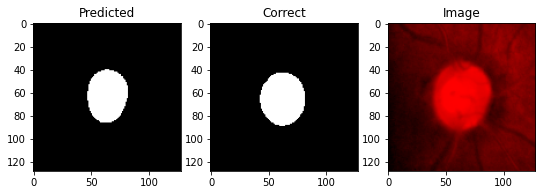

IOU: 0.8030914068222046
Dice: 0.8907938874394334
image #18


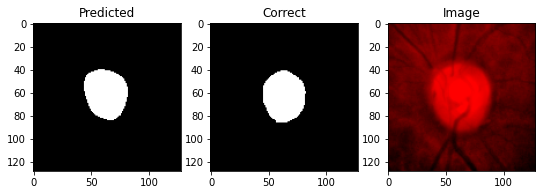

IOU: 0.8573476672172546
Dice: 0.9231956773446546
image #19


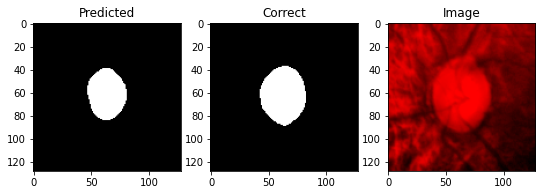

IOU: 0.7516129016876221
Dice: 0.858195211786372
image #20


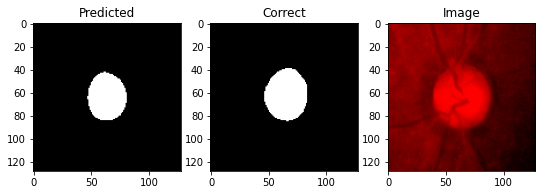

IOU: 0.8112359642982483
Dice: 0.8957816377171216
image #21


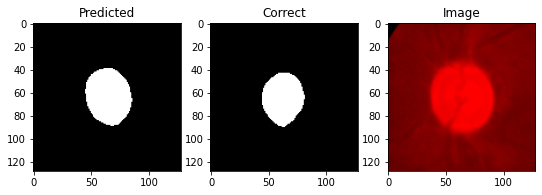

IOU: 0.757934033870697
Dice: 0.8623008849557522
image #22


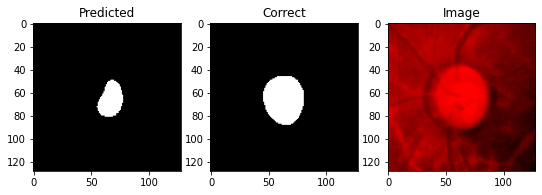

IOU: 0.4323180913925171
Dice: 0.6036621382161843
image #23


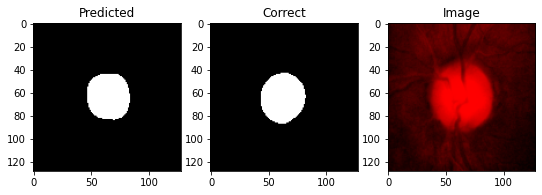

IOU: 0.822603702545166
Dice: 0.902668759811617
image #24


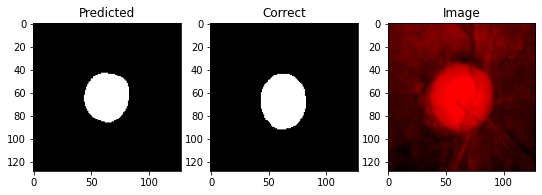

IOU: 0.8083600997924805
Dice: 0.8940256045519204
image #25


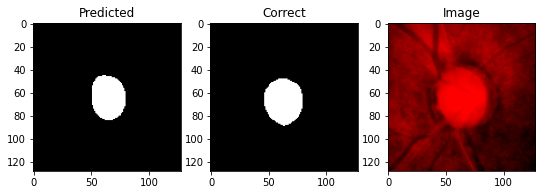

IOU: 0.7620320916175842
Dice: 0.8649468892261002
image #26


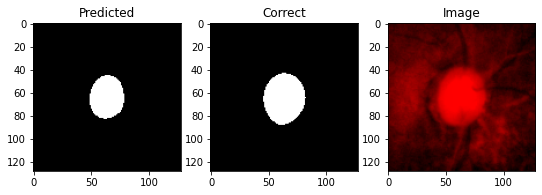

IOU: 0.7179693579673767
Dice: 0.8358348968105066
image #27


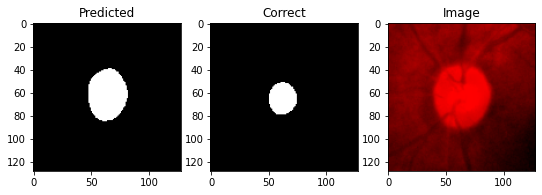

IOU: 0.4423236548900604
Dice: 0.6133486766398158
image #28


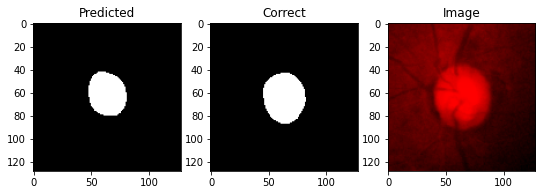

IOU: 0.7665369510650635
Dice: 0.8678414096916299
image #29


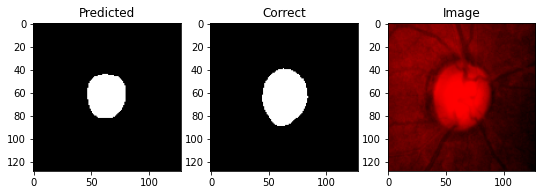

IOU: 0.7029034495353699
Dice: 0.8255352894528152
image #30


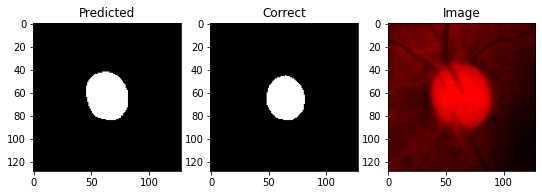

IOU: 0.8201970458030701
Dice: 0.9012178619756428
image #31


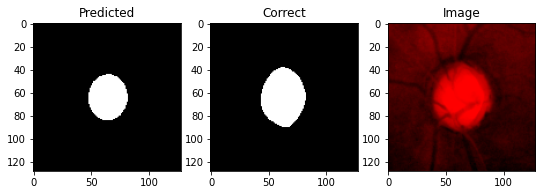

IOU: 0.7027925252914429
Dice: 0.8254588051542366
image #32


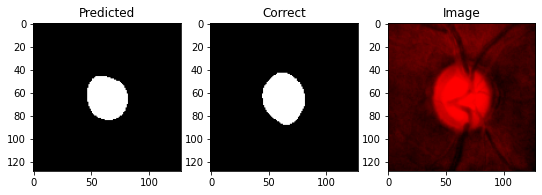

IOU: 0.8557692170143127
Dice: 0.9222797927461139
image #33


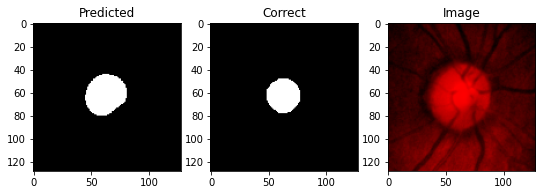

IOU: 0.6879432797431946
Dice: 0.8151260504201681
image #34


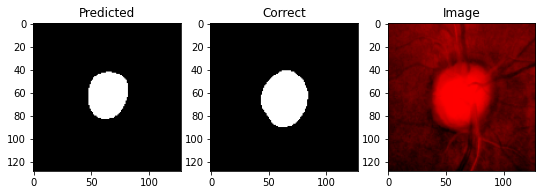

IOU: 0.7414247989654541
Dice: 0.8515151515151516
image #35


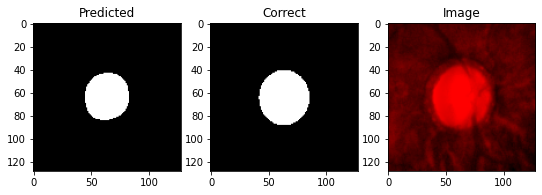

IOU: 0.7723926305770874
Dice: 0.8715818622360678
image #36


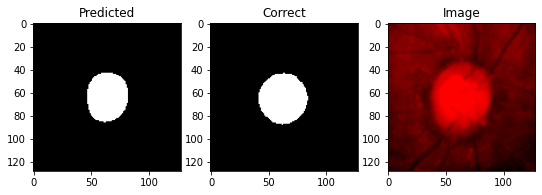

IOU: 0.8204081654548645
Dice: 0.9013452914798207
image #37


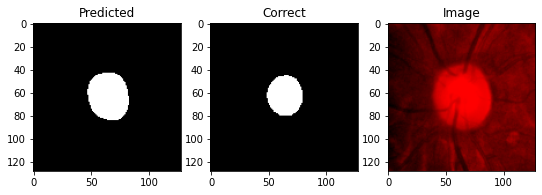

IOU: 0.7159664034843445
Dice: 0.8344760039177277
image #38


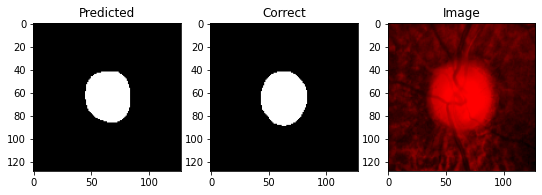

IOU: 0.8930202126502991
Dice: 0.943487250172295
image #39


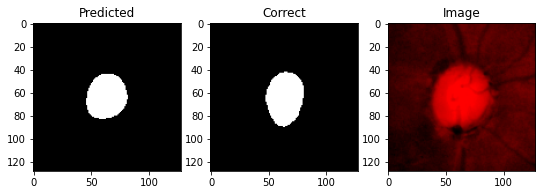

IOU: 0.8061708807945251
Dice: 0.8926850635129215
image #40


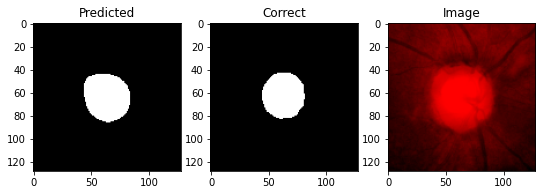

IOU: 0.8351567983627319
Dice: 0.910174880763116
image #41


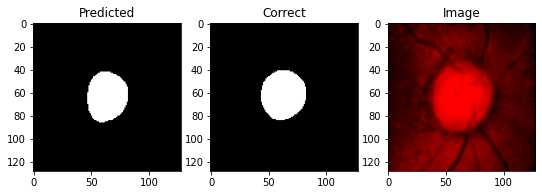

IOU: 0.8653987050056458
Dice: 0.927843137254902
image #42


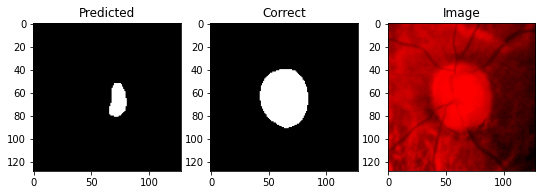

IOU: 0.1998799592256546
Dice: 0.33316658329164583
image #43


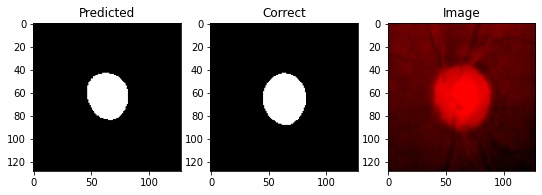

IOU: 0.8392722010612488
Dice: 0.9126133553173948
image #44


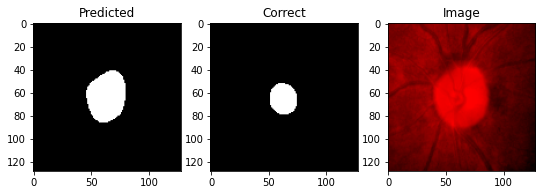

IOU: 0.43195265531539917
Dice: 0.6033057851239669
image #45


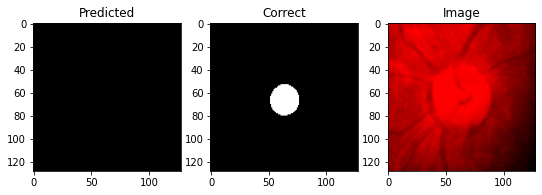

IOU: 0.0
Dice: 0.0
image #46


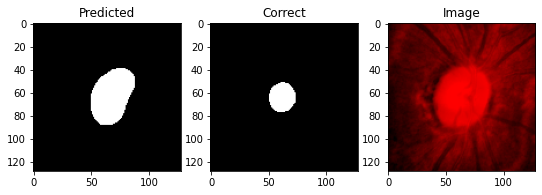

IOU: 0.3423357605934143
Dice: 0.5100598151169113
image #47


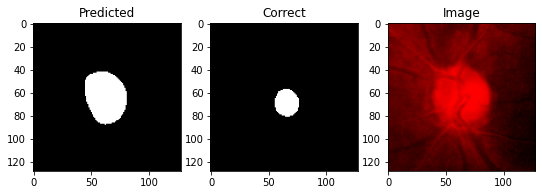

IOU: 0.30680060386657715
Dice: 0.46954464813719693
image #48


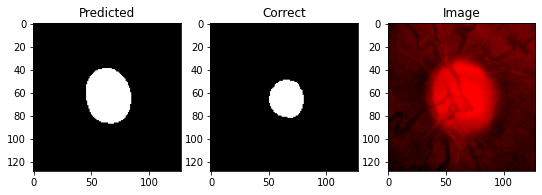

IOU: 0.517702043056488
Dice: 0.6822183098591549
image #49


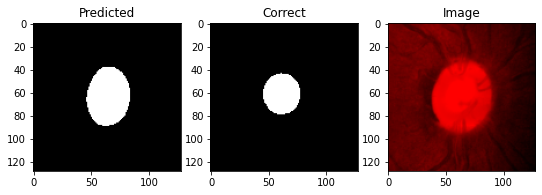

IOU: 0.5783606767654419
Dice: 0.7328624844204403
image #50


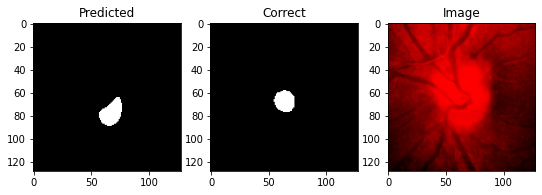

IOU: 0.16237623989582062
Dice: 0.27938671209540034


In [10]:
pred_iou, pred_dice, pred_cup = predict(red_channel_test, X_test, Y_test, model, img_size)

In [11]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.6595872
0.7719632145227567


### Training and test disc

In [12]:
X_test, Z_test = next(data_generator(red_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

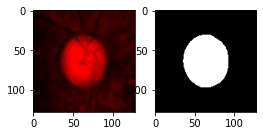

In [13]:
num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()

In [14]:
model_disc = create_compile_model(img_size)

history_disc = train(red_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_red', 
                     model_disc, epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 36s 342ms/step - loss: 1.0478 - mean_IOU_gpu: 0.0083 - dice_metric: 0.0164 - val_loss: 1.4897 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 34s 347ms/step - loss: 1.0178 - mean_IOU_gpu: 0.0394 - dice_metric: 0.0755 - val_loss: 1.4683 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 38s 383ms/step - loss: 0.9927 - mean_IOU_gpu: 0.0791 - dice_metric: 0.1460 - val_loss: 1.4429 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 35s 348ms/step - loss: 0.9856 - mean_IOU_gpu: 0.1543 - dice_metric: 0.2658 - val_loss: 1.4031 - val_mean_IOU_gpu: 0.1489 - val_dice_metric: 0.2473
Epoch 5/500
99/99 [==============================] - 35s 353ms/step - loss: 0.9550 - mean_IOU_gpu: 0.2467 - dice_metric: 0.3929 - val_loss: 1.3556 - val_mean_IOU_gpu: 0.4359 - 

99/99 [==============================] - 39s 393ms/step - loss: 0.0921 - mean_IOU_gpu: 0.8304 - dice_metric: 0.9005 - val_loss: 0.3134 - val_mean_IOU_gpu: 0.5301 - val_dice_metric: 0.6778
Epoch 42/500
99/99 [==============================] - 40s 403ms/step - loss: 0.0786 - mean_IOU_gpu: 0.8420 - dice_metric: 0.9102 - val_loss: 0.5088 - val_mean_IOU_gpu: 0.3653 - val_dice_metric: 0.5174
Epoch 43/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1025 - mean_IOU_gpu: 0.8148 - dice_metric: 0.8898 - val_loss: 0.3189 - val_mean_IOU_gpu: 0.5218 - val_dice_metric: 0.6696
Epoch 44/500
99/99 [==============================] - 39s 390ms/step - loss: 0.0762 - mean_IOU_gpu: 0.8475 - dice_metric: 0.9132 - val_loss: 0.3242 - val_mean_IOU_gpu: 0.5190 - val_dice_metric: 0.6667
Epoch 45/500
99/99 [==============================] - 39s 394ms/step - loss: 0.0870 - mean_IOU_gpu: 0.8348 - dice_metric: 0.9035 - val_loss: 0.2144 - val_mean_IOU_gpu: 0.6392 - val_dice_metric: 0.7662
Epoch 46

Epoch 82/500
99/99 [==============================] - 41s 413ms/step - loss: 0.0638 - mean_IOU_gpu: 0.8609 - dice_metric: 0.9229 - val_loss: 0.3756 - val_mean_IOU_gpu: 0.4772 - val_dice_metric: 0.6273
Epoch 83/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0659 - mean_IOU_gpu: 0.8582 - dice_metric: 0.9209 - val_loss: 0.1862 - val_mean_IOU_gpu: 0.6716 - val_dice_metric: 0.7888
Epoch 84/500
99/99 [==============================] - 39s 392ms/step - loss: 0.0640 - mean_IOU_gpu: 0.8641 - dice_metric: 0.9241 - val_loss: 0.2053 - val_mean_IOU_gpu: 0.6463 - val_dice_metric: 0.7737
Epoch 85/500
99/99 [==============================] - 39s 398ms/step - loss: 0.0634 - mean_IOU_gpu: 0.8610 - dice_metric: 0.9235 - val_loss: 0.2128 - val_mean_IOU_gpu: 0.6372 - val_dice_metric: 0.7674
Epoch 86/500
99/99 [==============================] - 38s 381ms/step - loss: 0.0611 - mean_IOU_gpu: 0.8671 - dice_metric: 0.9265 - val_loss: 0.2118 - val_mean_IOU_gpu: 0.6377 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 40s 404ms/step - loss: 0.0535 - mean_IOU_gpu: 0.8780 - dice_metric: 0.9339 - val_loss: 0.2122 - val_mean_IOU_gpu: 0.6374 - val_dice_metric: 0.7655
Epoch 124/500
99/99 [==============================] - 39s 396ms/step - loss: 0.0520 - mean_IOU_gpu: 0.8833 - dice_metric: 0.9365 - val_loss: 0.2388 - val_mean_IOU_gpu: 0.5991 - val_dice_metric: 0.7340
Epoch 125/500
99/99 [==============================] - 40s 409ms/step - loss: 0.0538 - mean_IOU_gpu: 0.8771 - dice_metric: 0.9333 - val_loss: 0.2026 - val_mean_IOU_gpu: 0.6496 - val_dice_metric: 0.7732
Epoch 126/500
99/99 [==============================] - 39s 394ms/step - loss: 0.0513 - mean_IOU_gpu: 0.8840 - dice_metric: 0.9372 - val_loss: 0.1938 - val_mean_IOU_gpu: 0.6642 - val_dice_metric: 0.7802
Epoch 127/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0460 - mean_IOU_gpu: 0.8912 - dice_metric: 0.9419 - val_loss: 0.1942 - val_mean_IOU_gpu: 0.6630 - val_dice_metri

99/99 [==============================] - 43s 433ms/step - loss: 0.0505 - mean_IOU_gpu: 0.8842 - dice_metric: 0.9375 - val_loss: 0.1956 - val_mean_IOU_gpu: 0.6618 - val_dice_metric: 0.7779
Epoch 164/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0441 - mean_IOU_gpu: 0.8967 - dice_metric: 0.9448 - val_loss: 0.1981 - val_mean_IOU_gpu: 0.6595 - val_dice_metric: 0.7751
Epoch 165/500
99/99 [==============================] - 42s 427ms/step - loss: 0.0448 - mean_IOU_gpu: 0.8948 - dice_metric: 0.9439 - val_loss: 0.2017 - val_mean_IOU_gpu: 0.6560 - val_dice_metric: 0.7718
Epoch 166/500
99/99 [==============================] - 43s 438ms/step - loss: 0.0422 - mean_IOU_gpu: 0.8992 - dice_metric: 0.9465 - val_loss: 0.2157 - val_mean_IOU_gpu: 0.6437 - val_dice_metric: 0.7612
Epoch 167/500
99/99 [==============================] - 43s 430ms/step - loss: 0.0437 - mean_IOU_gpu: 0.8973 - dice_metric: 0.9450 - val_loss: 0.2011 - val_mean_IOU_gpu: 0.6566 - val_dice_metric: 0.7724
Epoc

Epoch 204/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0430 - mean_IOU_gpu: 0.8984 - dice_metric: 0.9459 - val_loss: 0.2134 - val_mean_IOU_gpu: 0.6468 - val_dice_metric: 0.7632
Epoch 205/500
99/99 [==============================] - 41s 414ms/step - loss: 0.0417 - mean_IOU_gpu: 0.9004 - dice_metric: 0.9472 - val_loss: 0.2306 - val_mean_IOU_gpu: 0.6315 - val_dice_metric: 0.7507
Epoch 206/500
99/99 [==============================] - 43s 431ms/step - loss: 0.0419 - mean_IOU_gpu: 0.9008 - dice_metric: 0.9472 - val_loss: 0.2272 - val_mean_IOU_gpu: 0.6349 - val_dice_metric: 0.7536
Epoch 207/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0393 - mean_IOU_gpu: 0.9059 - dice_metric: 0.9501 - val_loss: 0.2217 - val_mean_IOU_gpu: 0.6391 - val_dice_metric: 0.7570
Epoch 208/500
99/99 [==============================] - 42s 426ms/step - loss: 0.0402 - mean_IOU_gpu: 0.9046 - dice_metric: 0.9492 - val_loss: 0.2197 - val_mean_IOU_gpu: 0.6409 - val_dice_metri

99/99 [==============================] - 43s 434ms/step - loss: 0.0434 - mean_IOU_gpu: 0.8977 - dice_metric: 0.9453 - val_loss: 0.2177 - val_mean_IOU_gpu: 0.6418 - val_dice_metric: 0.7594
Epoch 245/500
99/99 [==============================] - 41s 411ms/step - loss: 0.0387 - mean_IOU_gpu: 0.9074 - dice_metric: 0.9511 - val_loss: 0.2627 - val_mean_IOU_gpu: 0.6015 - val_dice_metric: 0.7271
Epoch 246/500
99/99 [==============================] - 44s 440ms/step - loss: 0.0385 - mean_IOU_gpu: 0.9078 - dice_metric: 0.9511 - val_loss: 0.2593 - val_mean_IOU_gpu: 0.6050 - val_dice_metric: 0.7298
Epoch 247/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0402 - mean_IOU_gpu: 0.9060 - dice_metric: 0.9499 - val_loss: 0.2683 - val_mean_IOU_gpu: 0.5962 - val_dice_metric: 0.7228
Epoch 248/500
99/99 [==============================] - 43s 428ms/step - loss: 0.0407 - mean_IOU_gpu: 0.9021 - dice_metric: 0.9481 - val_loss: 0.2337 - val_mean_IOU_gpu: 0.6269 - val_dice_metric: 0.7473
Epoc

Epoch 285/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0350 - mean_IOU_gpu: 0.9139 - dice_metric: 0.9547 - val_loss: 0.2619 - val_mean_IOU_gpu: 0.6018 - val_dice_metric: 0.7273
Epoch 286/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0391 - mean_IOU_gpu: 0.9060 - dice_metric: 0.9502 - val_loss: 0.2750 - val_mean_IOU_gpu: 0.5881 - val_dice_metric: 0.7164
Epoch 287/500
99/99 [==============================] - 43s 433ms/step - loss: 0.0447 - mean_IOU_gpu: 0.8954 - dice_metric: 0.9440 - val_loss: 0.2657 - val_mean_IOU_gpu: 0.5976 - val_dice_metric: 0.7239
Epoch 288/500
99/99 [==============================] - 42s 420ms/step - loss: 0.0367 - mean_IOU_gpu: 0.9114 - dice_metric: 0.9532 - val_loss: 0.2466 - val_mean_IOU_gpu: 0.6157 - val_dice_metric: 0.7384
Epoch 289/500
99/99 [==============================] - 42s 428ms/step - loss: 0.0404 - mean_IOU_gpu: 0.9060 - dice_metric: 0.9497 - val_loss: 0.2515 - val_mean_IOU_gpu: 0.6113 - val_dice_metri

99/99 [==============================] - 42s 426ms/step - loss: 0.0364 - mean_IOU_gpu: 0.9110 - dice_metric: 0.9531 - val_loss: 0.2600 - val_mean_IOU_gpu: 0.6043 - val_dice_metric: 0.7293
Epoch 326/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0392 - mean_IOU_gpu: 0.9063 - dice_metric: 0.9502 - val_loss: 0.2512 - val_mean_IOU_gpu: 0.6100 - val_dice_metric: 0.7338
Epoch 327/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0378 - mean_IOU_gpu: 0.9098 - dice_metric: 0.9522 - val_loss: 0.2714 - val_mean_IOU_gpu: 0.5910 - val_dice_metric: 0.7187
Epoch 328/500
99/99 [==============================] - 42s 419ms/step - loss: 0.0430 - mean_IOU_gpu: 0.8989 - dice_metric: 0.9460 - val_loss: 0.2605 - val_mean_IOU_gpu: 0.6026 - val_dice_metric: 0.7279
Epoch 329/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0382 - mean_IOU_gpu: 0.9081 - dice_metric: 0.9512 - val_loss: 0.2526 - val_mean_IOU_gpu: 0.6096 - val_dice_metric: 0.7335
Epoc

Epoch 366/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0352 - mean_IOU_gpu: 0.9147 - dice_metric: 0.9549 - val_loss: 0.2719 - val_mean_IOU_gpu: 0.5917 - val_dice_metric: 0.7194
Epoch 367/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0378 - mean_IOU_gpu: 0.9089 - dice_metric: 0.9518 - val_loss: 0.2945 - val_mean_IOU_gpu: 0.5713 - val_dice_metric: 0.7030
Epoch 368/500
99/99 [==============================] - 42s 427ms/step - loss: 0.0435 - mean_IOU_gpu: 0.9040 - dice_metric: 0.9478 - val_loss: 0.2619 - val_mean_IOU_gpu: 0.6015 - val_dice_metric: 0.7269
Epoch 369/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0342 - mean_IOU_gpu: 0.9153 - dice_metric: 0.9555 - val_loss: 0.2595 - val_mean_IOU_gpu: 0.6031 - val_dice_metric: 0.7282
Epoch 370/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0401 - mean_IOU_gpu: 0.9077 - dice_metric: 0.9503 - val_loss: 0.3016 - val_mean_IOU_gpu: 0.5655 - val_dice_metri

99/99 [==============================] - 42s 428ms/step - loss: 0.0348 - mean_IOU_gpu: 0.9149 - dice_metric: 0.9552 - val_loss: 0.2878 - val_mean_IOU_gpu: 0.5770 - val_dice_metric: 0.7075
Epoch 407/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0379 - mean_IOU_gpu: 0.9080 - dice_metric: 0.9513 - val_loss: 0.2755 - val_mean_IOU_gpu: 0.5873 - val_dice_metric: 0.7159
Epoch 408/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0334 - mean_IOU_gpu: 0.9185 - dice_metric: 0.9570 - val_loss: 0.2977 - val_mean_IOU_gpu: 0.5678 - val_dice_metric: 0.7002
Epoch 409/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0358 - mean_IOU_gpu: 0.9123 - dice_metric: 0.9538 - val_loss: 0.2918 - val_mean_IOU_gpu: 0.5733 - val_dice_metric: 0.7047
Epoch 410/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0376 - mean_IOU_gpu: 0.9094 - dice_metric: 0.9520 - val_loss: 0.2835 - val_mean_IOU_gpu: 0.5802 - val_dice_metric: 0.7102
Epoc

Epoch 447/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0343 - mean_IOU_gpu: 0.9167 - dice_metric: 0.9561 - val_loss: 0.2787 - val_mean_IOU_gpu: 0.5837 - val_dice_metric: 0.7130
Epoch 448/500
99/99 [==============================] - 42s 428ms/step - loss: 0.0350 - mean_IOU_gpu: 0.9145 - dice_metric: 0.9550 - val_loss: 0.2966 - val_mean_IOU_gpu: 0.5699 - val_dice_metric: 0.7019
Epoch 449/500
99/99 [==============================] - 43s 430ms/step - loss: 0.0346 - mean_IOU_gpu: 0.9155 - dice_metric: 0.9554 - val_loss: 0.2864 - val_mean_IOU_gpu: 0.5782 - val_dice_metric: 0.7085
Epoch 450/500
99/99 [==============================] - 43s 439ms/step - loss: 0.0341 - mean_IOU_gpu: 0.9173 - dice_metric: 0.9564 - val_loss: 0.2781 - val_mean_IOU_gpu: 0.5853 - val_dice_metric: 0.7142
Epoch 451/500
99/99 [==============================] - 43s 435ms/step - loss: 0.0322 - mean_IOU_gpu: 0.9199 - dice_metric: 0.9581 - val_loss: 0.2758 - val_mean_IOU_gpu: 0.5873 - val_dice_metri

99/99 [==============================] - 41s 419ms/step - loss: 0.0339 - mean_IOU_gpu: 0.9172 - dice_metric: 0.9564 - val_loss: 0.3037 - val_mean_IOU_gpu: 0.5628 - val_dice_metric: 0.6964
Epoch 488/500
99/99 [==============================] - 43s 434ms/step - loss: 0.0328 - mean_IOU_gpu: 0.9195 - dice_metric: 0.9577 - val_loss: 0.2975 - val_mean_IOU_gpu: 0.5680 - val_dice_metric: 0.7006
Epoch 489/500
99/99 [==============================] - 43s 432ms/step - loss: 0.0334 - mean_IOU_gpu: 0.9182 - dice_metric: 0.9570 - val_loss: 0.2926 - val_mean_IOU_gpu: 0.5725 - val_dice_metric: 0.7043
Epoch 490/500
99/99 [==============================] - 43s 434ms/step - loss: 0.0372 - mean_IOU_gpu: 0.9097 - dice_metric: 0.9522 - val_loss: 0.3036 - val_mean_IOU_gpu: 0.5622 - val_dice_metric: 0.6959
Epoch 491/500
99/99 [==============================] - 43s 433ms/step - loss: 0.0330 - mean_IOU_gpu: 0.9189 - dice_metric: 0.9574 - val_loss: 0.3055 - val_mean_IOU_gpu: 0.5612 - val_dice_metric: 0.6951
Epoc

image #0


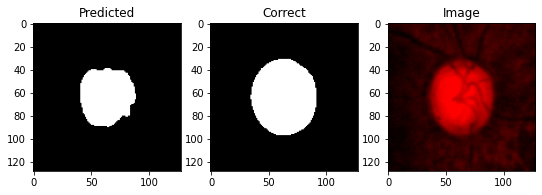

IOU: 0.6518218517303467
Dice: 0.7892156862745098
image #1


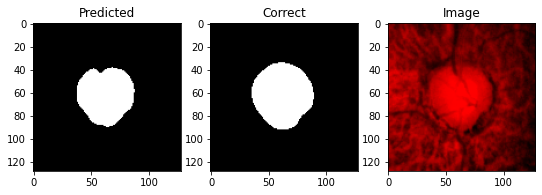

IOU: 0.838431715965271
Dice: 0.9121162409186783
image #2


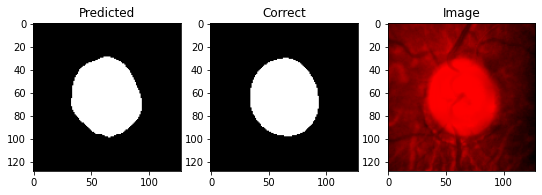

IOU: 0.9424968957901001
Dice: 0.9703973405097356
image #3


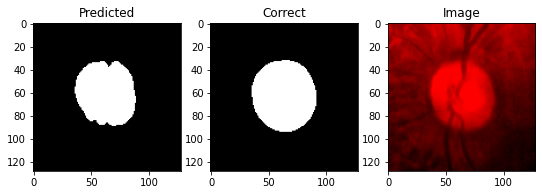

IOU: 0.8434562683105469
Dice: 0.9150813885075505
image #4


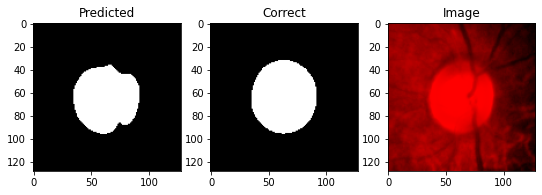

IOU: 0.8863872289657593
Dice: 0.9397723099522586
image #5


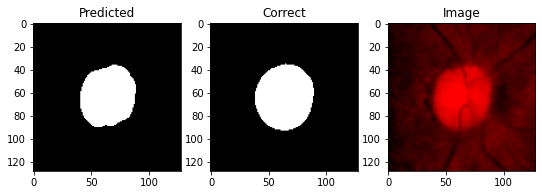

IOU: 0.8927637338638306
Dice: 0.943344081068632
image #6


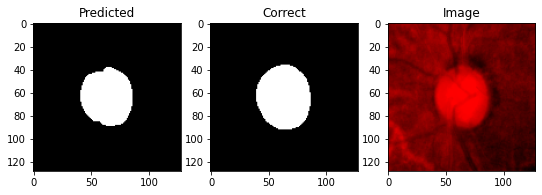

IOU: 0.8615237474441528
Dice: 0.9256113256113256
image #7


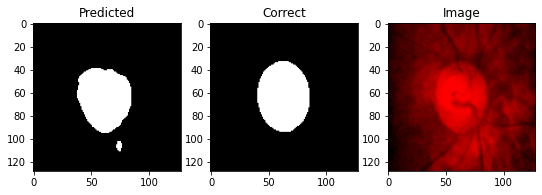

IOU: 0.8339100480079651
Dice: 0.909433962264151
image #8


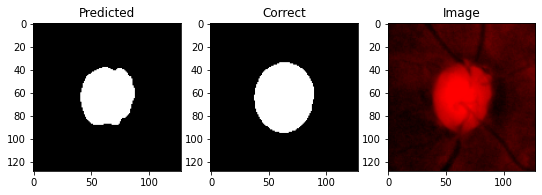

IOU: 0.7692932486534119
Dice: 0.869605142332415
image #9


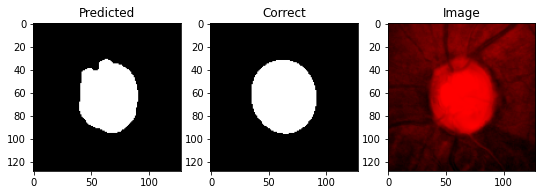

IOU: 0.8832807540893555
Dice: 0.9380234505862647
image #10


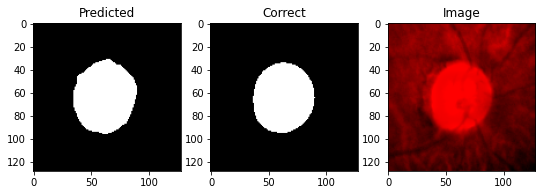

IOU: 0.9117432236671448
Dice: 0.9538344143456696
image #11


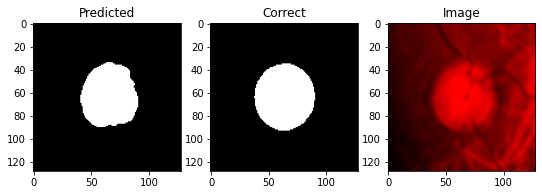

IOU: 0.875205934047699
Dice: 0.9334504722161212
image #12


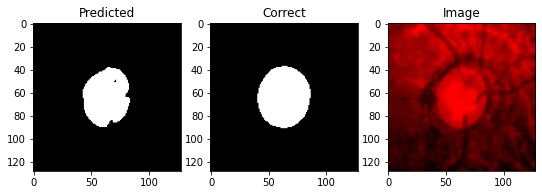

IOU: 0.8297761678695679
Dice: 0.9069701280227596
image #13


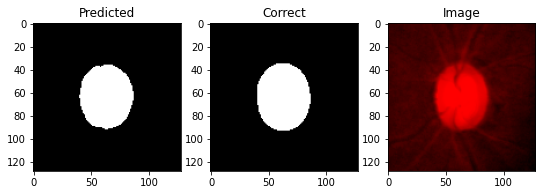

IOU: 0.9377018809318542
Dice: 0.9678494879733269
image #14


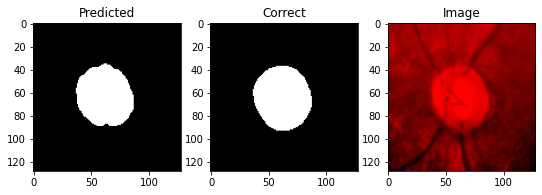

IOU: 0.908199667930603
Dice: 0.9518916394208314
image #15


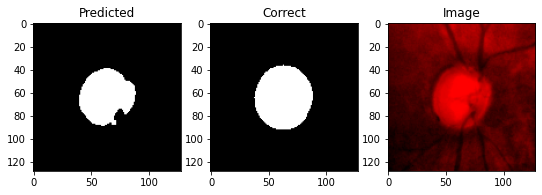

IOU: 0.7948834896087646
Dice: 0.8857215576482566
image #16


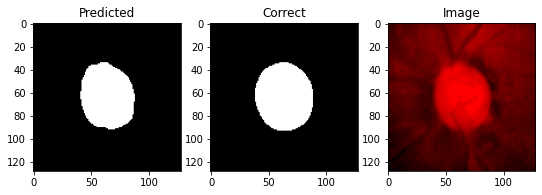

IOU: 0.8978562355041504
Dice: 0.9461794019933555
image #17


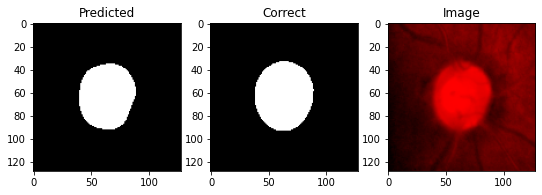

IOU: 0.9255097508430481
Dice: 0.9613140263669765
image #18


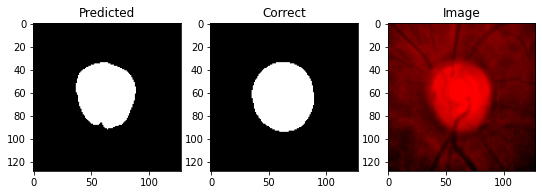

IOU: 0.8669245839118958
Dice: 0.9287194363862412
image #19


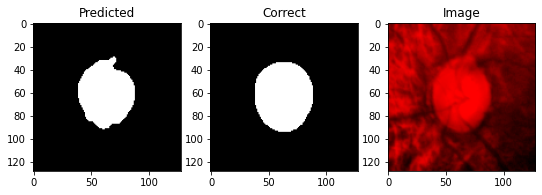

IOU: 0.8519114851951599
Dice: 0.9200347674923947
image #20


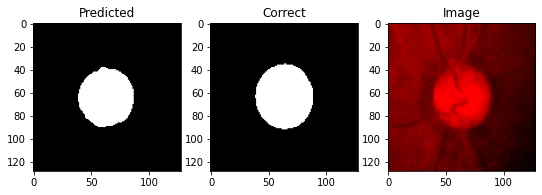

IOU: 0.8628959059715271
Dice: 0.9264027204274957
image #21


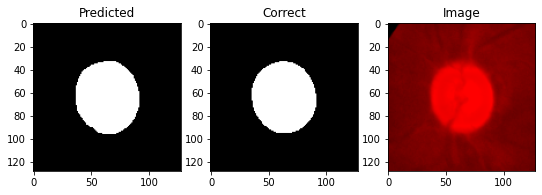

IOU: 0.9702615737915039
Dice: 0.9849063466084743
image #22


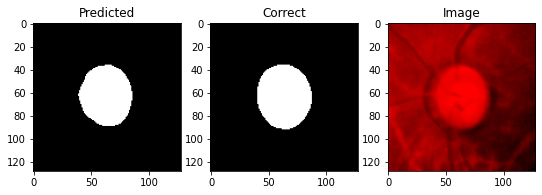

IOU: 0.8998569250106812
Dice: 0.947289156626506
image #23


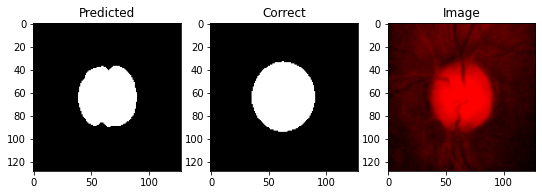

IOU: 0.8429784178733826
Dice: 0.9148000837345615
image #24


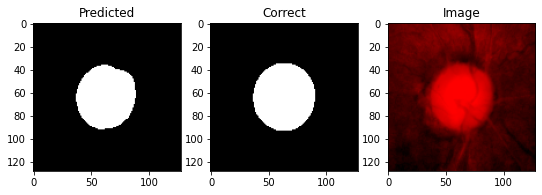

IOU: 0.9056832194328308
Dice: 0.950507614213198
image #25


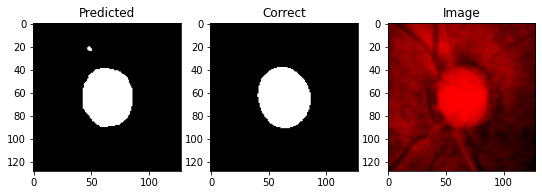

IOU: 0.9234399795532227
Dice: 0.9601962922573609
image #26


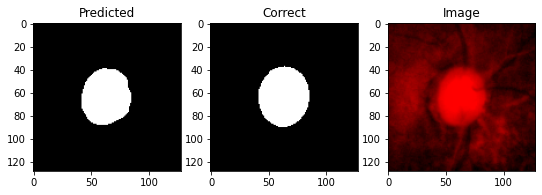

IOU: 0.9066959619522095
Dice: 0.9510650546919976
image #27


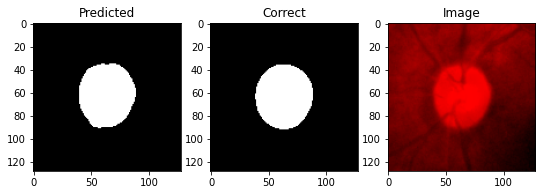

IOU: 0.9317980408668518
Dice: 0.9646950939935809
image #28


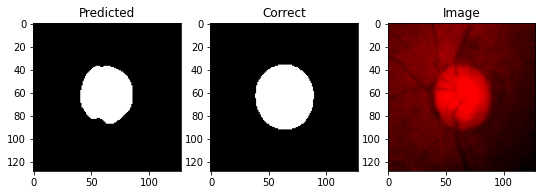

IOU: 0.786347508430481
Dice: 0.8803970223325062
image #29


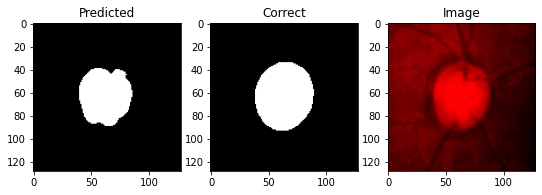

IOU: 0.7694256901741028
Dice: 0.8696897374701671
image #30


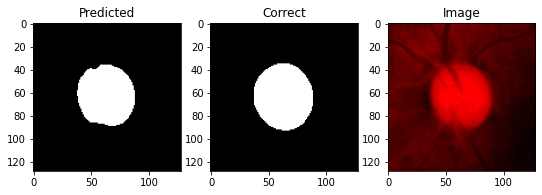

IOU: 0.8953885436058044
Dice: 0.9448073890515882
image #31


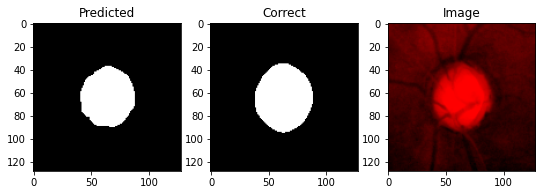

IOU: 0.841318666934967
Dice: 0.9138219145380759
image #32


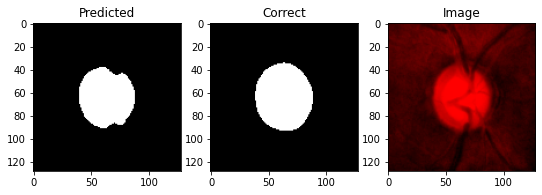

IOU: 0.8560869693756104
Dice: 0.9224642773483251
image #33


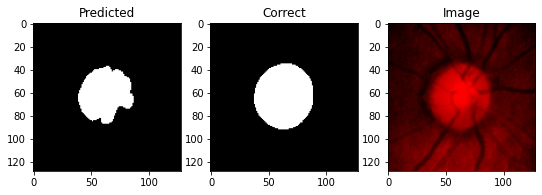

IOU: 0.7344706654548645
Dice: 0.8469104665825977
image #34


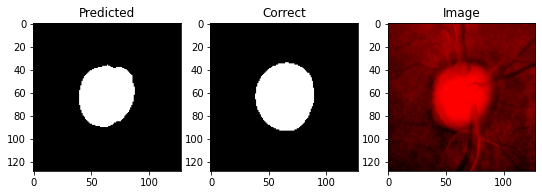

IOU: 0.8592624068260193
Dice: 0.9243046055631555
image #35


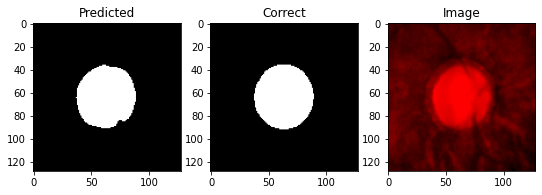

IOU: 0.9360591769218445
Dice: 0.966973713772186
image #36


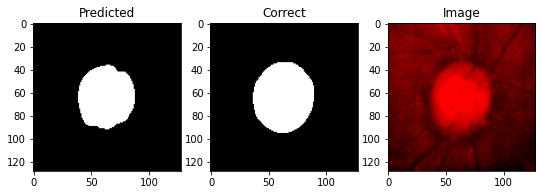

IOU: 0.8403295278549194
Dice: 0.9132381155403965
image #37


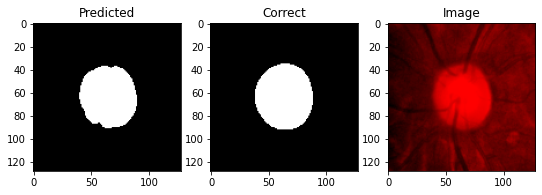

IOU: 0.9160138964653015
Dice: 0.9561662502838973
image #38


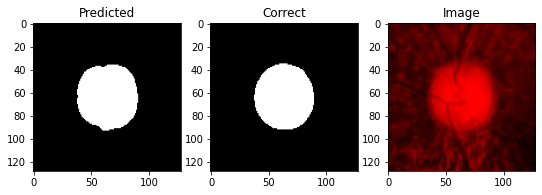

IOU: 0.9345794320106506
Dice: 0.966183574879227
image #39


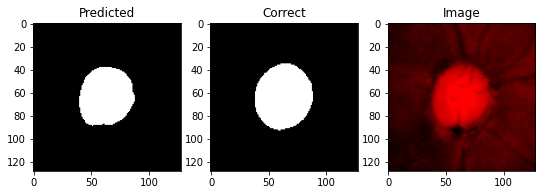

IOU: 0.8645507097244263
Dice: 0.9273555502277632
image #40


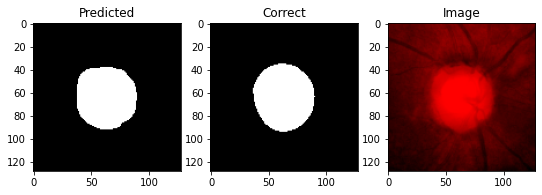

IOU: 0.9178802371025085
Dice: 0.9571820291077832
image #41


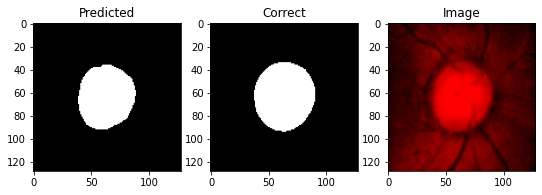

IOU: 0.8693729639053345
Dice: 0.9301225542894002
image #42


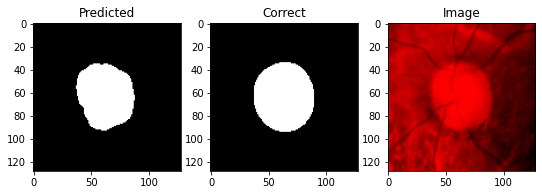

IOU: 0.8561989665031433
Dice: 0.9225293132328308
image #43


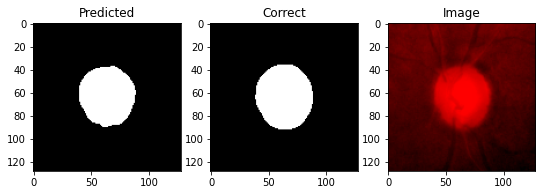

IOU: 0.9043083786964417
Dice: 0.9497499404620148
image #44


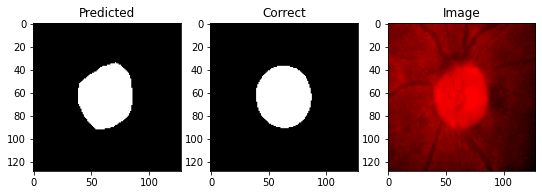

IOU: 0.9007844924926758
Dice: 0.9478028647730031
image #45


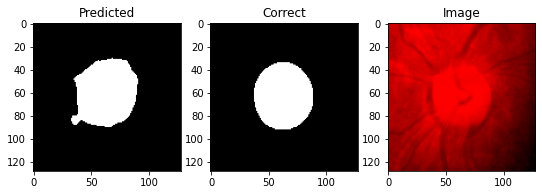

IOU: 0.8315596580505371
Dice: 0.9080344620316569
image #46


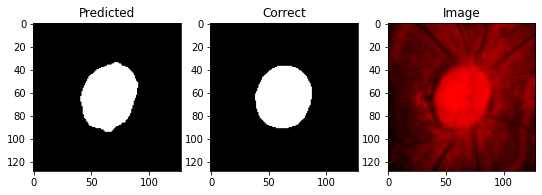

IOU: 0.8723683953285217
Dice: 0.9318341531974701
image #47


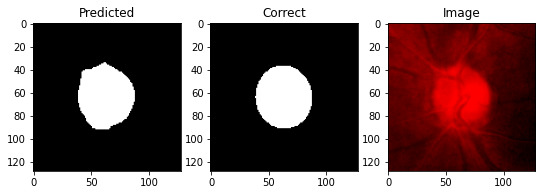

IOU: 0.9101580381393433
Dice: 0.9529662018435358
image #48


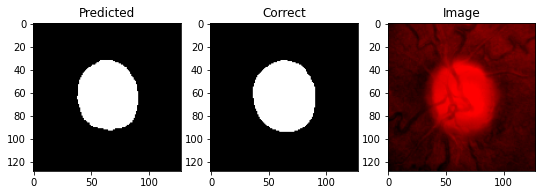

IOU: 0.9494949579238892
Dice: 0.9740932642487047
image #49


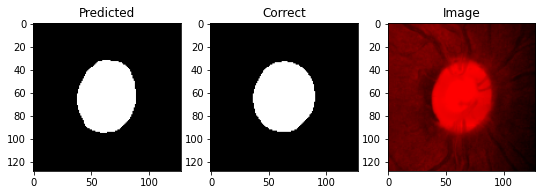

IOU: 0.936170220375061
Dice: 0.967032967032967
image #50


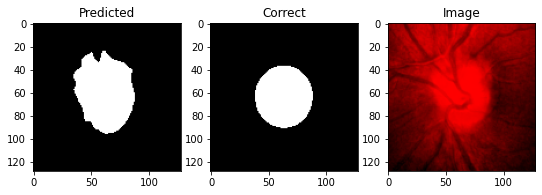

IOU: 0.7443284392356873
Dice: 0.8534269199009084


In [15]:
pred_iou, pred_dice, pred_disc = predict(red_channel_test, X_test, Z_test, model_disc, img_size)

In [16]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.87006164
0.9293238413755841


### Cálculo do CDR

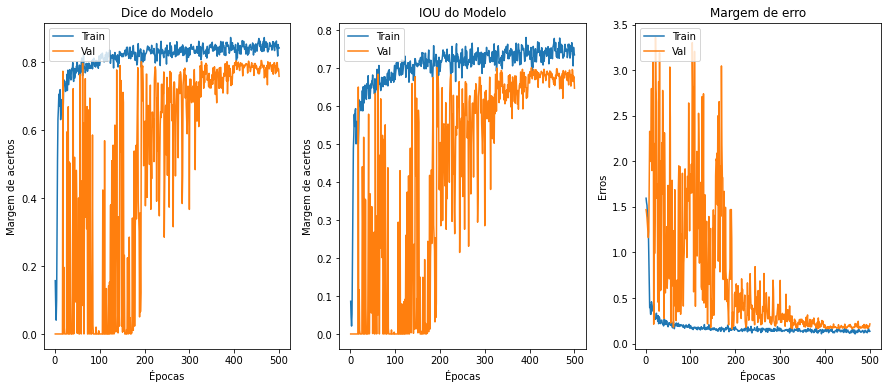

In [20]:
plot_results(history_cup, epochs)

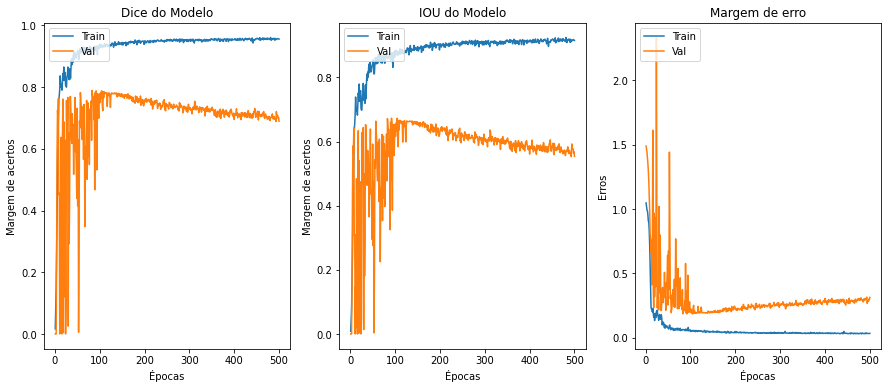

In [21]:
plot_results(history_disc, epochs)

In [22]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.8222296442028272
image #1 - cdr = 0.7634770137095283
image #2 - cdr = 0.7136603952892493
image #3 - cdr = 0.7352903624243399
image #4 - cdr = 0.5818251683046539
image #5 - cdr = 0.7827836876366627
image #6 - cdr = 0.7749456068248405
image #7 - cdr = 0.6904655408222155
image #8 - cdr = 0.7994944998638389
image #9 - cdr = 0.7755709184551376
image #10 - cdr = 0.7309844022392716
image #11 - cdr = 0.7810992579976791
image #12 - cdr = 0.6982690727782657
image #13 - cdr = 0.7863888811710361
image #14 - cdr = 0.6182698825128189
image #15 - cdr = 0.7482137374198354
image #16 - cdr = 0.7911531921174213
image #17 - cdr = 0.7969389747840077
image #18 - cdr = 0.7878951743569615
image #19 - cdr = 0.7675842529698336
image #20 - cdr = 0.8205273728715677
image #21 - cdr = 0.7885477044186234
image #22 - cdr = 0.617624411444843
image #23 - cdr = 0.7672967159276809
image #24 - cdr = 0.7707974275256392
image #25 - cdr = 0.7675516517824821
image #26 - cdr = 0.7633028207073794
image #27 - 

In [23]:
pd.DataFrame(data= result)

cdr      area
0   0.822230  0.642857
1   0.763477  0.624872
2   0.713660  0.338170
3   0.735290  0.494898
4   0.581825  0.149002
5   0.782784  0.575669
6   0.774946  0.547831
7   0.690466  0.420797
8   0.799494  0.595037
9   0.775571  0.561410
10  0.730984  0.533854
11  0.781099  0.559174
12  0.698269  0.457340
13  0.786389  0.556155
14  0.618270  0.317766
15  0.748214  0.553130
16  0.791153  0.548372
17  0.796939  0.571942
18  0.787895  0.570676
19  0.767584  0.538106
20  0.820527  0.576883
21  0.788548  0.557887
22  0.617624  0.269231
23  0.767297  0.562929
24  0.770797  0.585670
25  0.767552  0.515660
26  0.763303  0.534493
27  0.800314  0.556582
28  0.792253  0.568054
29  0.773046  0.571350
30  0.802831  0.578897
31  0.766350  0.552247
32  0.758536  0.542915
33  0.772290  0.584872
34  0.767902  0.555665
35  0.764895  0.573838
36  0.791037  0.571895
37  0.784156  0.558685
38  0.794149  0.586705
39  0.762413  0.567372
40  0.795959  0.581245
41  0.785118  0.562615
42  0.527599  0.147215
43  0.788479  0.567920
44  0.797421  0.569571
45  0.000000  0.000000
46  0.887701  0.629017
47  0.842308  0.606089
48  0.798004  0.588212
49  0.808115  0.595341
50  0.374744  0.118315

In [24]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   37.546391  42.560898  48.446896  51.762787
1   37.153992  38.761131  49.980297  50.769218
2   37.693932  48.883015  59.489891  68.496185
3   34.999985  42.860931  51.538898  58.291164
4   15.513056  34.188450  57.157272  58.760693
5   34.927441  43.343586  47.603168  55.371090
6   32.311394  39.115913  45.664177  50.475689
7   30.731087  39.153774  46.384842  56.706341
8   34.713863  41.605576  46.582851  52.039852
9   37.624580  48.280781  52.224621  62.251923
10  39.784721  46.464783  54.308056  63.564671
11  35.646526  44.143764  49.762070  56.514923
12  26.215094  35.729660  40.342377  51.168900
13  32.954739  44.051289  46.559696  56.017181
14  26.169348  33.953838  48.557125  54.917503
15  33.394550  37.749992  45.245033  50.453487
16  32.335320  46.744247  46.603844  59.083687
17  35.010536  46.499050  48.860329  58.347065
18  37.129066  45.126484  51.145954  57.274731
19  33.539318  44.798027  48.352119  58.362358
20  33.716160  41.788082  48.076603  50.928322
21  39.400040  50.210266  55.546619  63.674355
22  20.347076  32.871025  45.559448  53.221706
23  38.057953  41.477524  51.981079  54.056694
24  38.999439  43.146267  51.350822  55.976143
25  29.898794  39.591660  44.165073  51.581753
26  30.138142  37.875507  43.044823  49.620552
27  34.168091  45.305519  49.038803  56.609669
28  32.718555  39.503441  45.832588  49.862137
29  34.056114  39.220718  46.538235  50.735291
30  35.928097  43.283848  49.921982  53.914051
31  33.934971  39.886990  47.104824  52.048016
32  34.727966  39.497791  48.767418  52.071106
33  33.092846  38.177681  44.205044  49.434399
34  34.445370  42.017925  47.533264  54.717812
35  38.435246  41.910782  51.128479  54.792824
36  35.929703  43.722839  49.679653  55.272820
37  35.481598  42.972046  49.721455  54.800407
38  39.841770  45.743195  53.798782  57.600250
39  34.902466  40.499844  46.913570  53.120602
40  38.938808  44.411777  53.259678  55.796539
41  35.441494  44.419170  49.266312  56.576405
42  14.486926  31.157112  49.468765  59.054493
43  35.106781  41.343792  48.790508  52.434868
44  33.707653  45.297569  47.239391  56.805092
45   0.000000   0.000000   0.000000   0.000000
46  33.322968  53.442482  46.391850  60.203243
47  35.343449  47.304741  49.136192  56.160828
48  39.139412  48.982658  52.958862  61.381477
49  37.244282  51.801086  50.487049  64.101120
50  17.026564  25.992413  50.979832  69.360497